<a href="https://colab.research.google.com/github/DinukiFernando/loan-default-prediction/blob/main/loan_default_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Graph

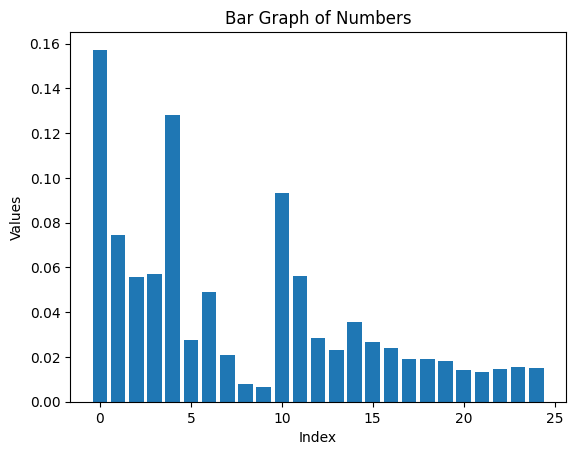

In [ ]:
import matplotlib.pyplot as plt

numbers = [0.1573299, 0.07453728, 0.05556939, 0.05692149, 0.12802221,
           0.02774098, 0.04885557, 0.02074532, 0.007953, 0.00643687,
           0.09338513, 0.05609552, 0.02839613, 0.02308387, 0.03545372,
           0.02679583, 0.02411469, 0.01897757, 0.01896007, 0.01821453]

# Create a bar graph
plt.bar(range(len(numbers)), numbers)
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Bar Graph of Numbers')
plt.show()


# stop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Machine learning/train_data_0.pq'
df = pd.read_parquet(file_path)

In [ ]:
path="/content/drive/MyDrive/Machine learning/target.csv"
df2 = pd.read_csv(path)

In [ ]:
path2="/content/drive/MyDrive/Machine learning/loan_count_id_table.csv"
df3 = pd.read_csv(path2)
loan_count=df3['Loan Count']

In [ ]:
merged_df = pd.merge(df, df2, on='id', how='left')


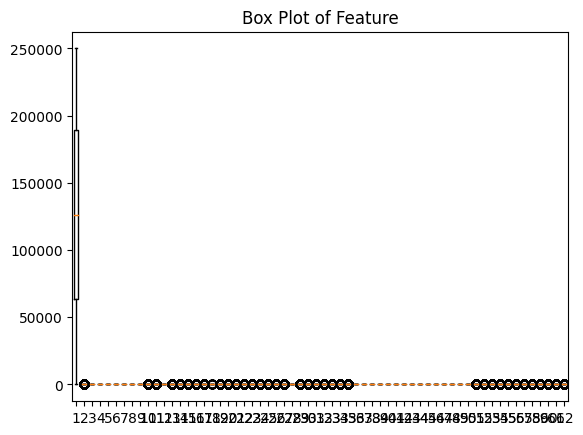

In [ ]:
import matplotlib.pyplot as plt

# Create a box plot for a specific feature (e.g., 'feature_name')
plt.boxplot(merged_df)
plt.title('Box Plot of Feature')
plt.show()


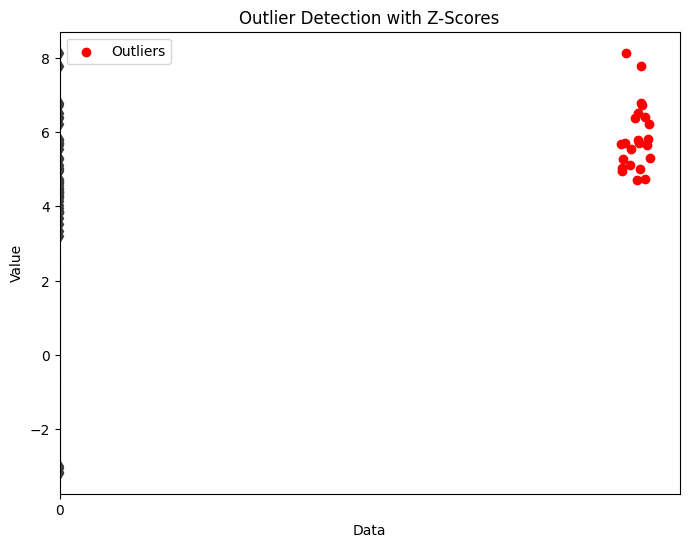

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data=merged_df
# Generate some random data with outliers
data = np.random.normal(0, 1, 1000)
data[950:] += 5  # Adding outliers

# Calculate Z-scores for the data points
z_scores = (data - np.mean(data)) / np.std(data)

# Define a threshold for identifying outliers (e.g., Z-score > 3)
threshold = 3

# Find the indices of outliers
outlier_indices = np.where(np.abs(z_scores) > threshold)

# Create a box plot to visualize the data and outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, orient='v', width=0.5)
plt.scatter(outlier_indices, data[outlier_indices], color='red', marker='o', label='Outliers')
plt.xlabel('Data')
plt.ylabel('Value')
plt.title('Outlier Detection with Z-Scores')
plt.legend()
plt.show()


In [ ]:
merged_df['Loan Count']=loan_count

In [ ]:
merged_df.isnull().sum()

**Address the challenges posed by imbalanced datasets**
1. Resampling
2. Data Preprocessing
3. Class Balancing


In [ ]:
# Assuming 'merged_df' is your DataFrame with features and the 'flag' column
X = merged_df.drop('flag', axis=1)  # Features
y = merged_df['flag']  # Target variable

# Instantiate SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to a DataFrame
balanced_data = pd.DataFrame(X_resampled, columns=X.columns)
balanced_data['flag'] = y_resampled

# Shuffle the data to ensure randomness
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Now 'balanced_data' contains a balanced dataset with equal samples from both classes in 'flag'

**Handle outliers using IQR method**

In [ ]:
Q1 = balanced_data.quantile(0.25)
Q3 = balanced_data.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for considering data points as outliers
threshold = 1.5

# Identify and remove outliers
outliers = ((balanced_data < (Q1 - threshold * IQR)) | (balanced_data > (Q3 + threshold * IQR))).any(axis=1)
X_no_outliers = balanced_data[~outliers]
y_no_outliers = balanced_data['flag'][~outliers]

# Now, X_no_outliers and y_no_outliers contain data with outliers removed


# Feature Engineering

**Using domain knowledge selected 35 features**

In [ ]:

selected_columns = [
    'pre_since_opened', 'pre_loans_credit_limit',
    'pre_loans_next_pay_summ', 'pre_loans_outstanding',
    'pre_loans_total_overdue', 'pre_loans_max_overdue_sum',
    'pre_loans_credit_cost_rate', 'pre_loans5', 'pre_loans530', 'pre_loans3060',
    'pre_loans6090', 'pre_loans90', 'is_zero_loans5', 'is_zero_loans530',
    'is_zero_loans3060', 'is_zero_loans6090', 'is_zero_loans90', 'pre_util',
    'pre_over2limit', 'pre_maxover2limit', 'is_zero_util', 'is_zero_over2limit',
    'is_zero_maxover2limit', 'enc_paym_12',
    'enc_paym_13', 'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17',
    'enc_paym_18', 'enc_paym_19', 'enc_paym_20', 'enc_paym_21', 'enc_paym_22',
    'enc_paym_23', 'enc_paym_24'
]

In [ ]:
X = balanced_data[selected_columns]
y = balanced_data["flag"]

# X = X_no_outliers[selected_columns]
# y = X_no_outliers["flag"]

**Using SelectKBest selected 25 features**

In [ ]:
X = balanced_data[selected_columns]
y = balanced_data["flag"]

# Perform feature selection using SelectKBest and chi-squared test
selector = SelectKBest(score_func=chi2, k=25)  # Select top 25 features
X_new = selector.fit_transform(X, y)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)

# Get the selected feature names
selected_features = X.columns[selected_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['pre_since_opened', 'pre_loans_next_pay_summ', 'pre_loans_outstanding',
       'pre_loans_max_overdue_sum', 'pre_loans_credit_cost_rate',
       'is_zero_loans5', 'is_zero_loans530', 'is_zero_loans3060',
       'is_zero_loans6090', 'is_zero_loans90', 'pre_util', 'pre_maxover2limit',
       'is_zero_util', 'is_zero_maxover2limit', 'enc_paym_12', 'enc_paym_13',
       'enc_paym_14', 'enc_paym_15', 'enc_paym_16', 'enc_paym_17',
       'enc_paym_18', 'enc_paym_19', 'enc_paym_21', 'enc_paym_22',
       'enc_paym_23'],
      dtype='object')


# Loan Count

In [ ]:
enc_paym_columns=['enc_paym_12', 'enc_paym_13', 'enc_paym_14', 'enc_paym_15',
       'enc_paym_16', 'enc_paym_17', 'enc_paym_18', 'enc_paym_19',
       'enc_paym_20', 'enc_paym_21', 'enc_paym_22', 'enc_paym_23',
       'enc_paym_24']

# # Create new columns to count the occurrences of each value
# for i in range(5):
#     col_name = f'count_{i}'
#     merged_df[col_name] = merged_df[enc_paym_columns].apply(lambda x: x.value_counts().get(i, 0), axis=1)


# Create a new DataFrame with the 'id' and count columns
count_table = merged_df[['id']].copy()

# Iterate over the count columns
for i in range(5):
    col_name = f'count_{i}'
    count_table[col_name] = merged_df[enc_paym_columns].applymap(lambda x: 1 if x == i else 0).sum(axis=1)

# Print the new DataFrame
print(count_table)

             id  count_0  count_1  count_2  count_3  count_4
0             0        0        0        0       11        2
1             0       11        1        0        0        1
2             0       11        1        0        0        1
3             0        0        0        0       11        2
4             0        0        0        0       11        2
...         ...      ...      ...      ...      ...      ...
1974719  249998        1        0        0       10        2
1974720  249998        0        0        0       11        2
1974721  249999        0        0        0       11        2
1974722  249999        0        0        0       11        2
1974723  249999        0        0        0       11        2

[1974724 rows x 6 columns]


In [ ]:
# Create a new DataFrame with the 'id' column
count_table = merged_df[['id']].copy()

# Calculate the count of loans for each user
loan_counts = merged_df.groupby('id').size()

# Add the count of loans as a new column in count_table
count_table['Loan Count'] = count_table['id'].map(loan_counts)

# Iterate over the count columns
for i in range(5):
    col_name = f'count_{i}'
    count_table[col_name] = merged_df[enc_paym_columns].applymap(lambda x: 1 if x == i else 0).sum(axis=1)

# Print the new DataFrame
print(count_table)


             id  Loan Count  count_0  count_1  count_2  count_3  count_4
0             0          10        0        0        0       11        2
1             0          10       11        1        0        0        1
2             0          10       11        1        0        0        1
3             0          10        0        0        0       11        2
4             0          10        0        0        0       11        2
...         ...         ...      ...      ...      ...      ...      ...
1974719  249998           5        1        0        0       10        2
1974720  249998           5        0        0        0       11        2
1974721  249999           3        0        0        0       11        2
1974722  249999           3        0        0        0       11        2
1974723  249999           3        0        0        0       11        2

[1974724 rows x 7 columns]


In [ ]:
count_table.head(10)

In [ ]:
loan_count_id_table = count_table[['id', 'Loan Count']]
loan_count_id_table

,id,Loan Count
0,0,10
1,0,10
2,0,10
3,0,10
4,0,10
...,...,...
1974719,249998,5
1974720,249998,5
1974721,249999,3
1974722,249999,3


In [ ]:
# Assuming you have a DataFrame called 'loan_count_id_table'
loan_count_id_table.to_csv('loan_count_id_table.csv', index=False)


In [ ]:
from google.colab import files

# Assuming the file is named 'loan_count_id_table.csv'
files.download('loan_count_id_table.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# agian

**Using RandomForestClassifier get the importances of the 25 features and selected highest importance 8 features**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Get feature importances
feature_importances = model.feature_importances_
feature_importances

In [ ]:
# Sample list of numbers
numbers = [0.1573299 , 0.07453728, 0.05556939, 0.05692149, 0.12802221,
       0.02774098, 0.04885557, 0.02074532, 0.007953  , 0.00643687,
       0.09338513, 0.05609552, 0.02839613, 0.02308387, 0.03545372,
       0.02679583, 0.02411469, 0.01897757, 0.01896007, 0.01821453,
       0.01436065, 0.01315547, 0.01447589, 0.01533943, 0.01507948]


# Enumerate the list to get (index, value) pairs
enumerated_numbers = list(enumerate(numbers))

# Sort the list of pairs by the values in descending order
sorted_numbers = sorted(enumerated_numbers, key=lambda x: x[1], reverse=True)

# Get the 5 largest numbers and their positions
largest_numbers = sorted_numbers[:10]

# Print the 5 largest numbers and their positions
for position, value in largest_numbers:
    print(f"The largest number is {value} at position {position}.")


The largest number is 0.1573299 at position 0.
The largest number is 0.12802221 at position 4.
The largest number is 0.09338513 at position 10.
The largest number is 0.07453728 at position 1.
The largest number is 0.05692149 at position 3.
The largest number is 0.05609552 at position 11.
The largest number is 0.05556939 at position 2.
The largest number is 0.04885557 at position 6.
The largest number is 0.03545372 at position 14.
The largest number is 0.02839613 at position 12.


Selected Features:
  1. pre_since_opened
  2. pre_loans_credit_cost_rate
  3. pre_util
  4. pre_loans_next_pay_summ
  5. pre_loans_max_overdue_sum


In [ ]:
selected_features =['pre_since_opened','pre_loans_credit_cost_rate','pre_util','pre_loans_next_pay_summ','pre_loans_max_overdue_sum']

In [ ]:
# selected_feature_names = ['pre_since_opened', 'pre_loans_credit_cost_rate', 'pre_util', 'pre_loans_next_pay_summ', 'pre_loans_max_overdue_sum']

# selected_feature_names = ['pre_since_opened', 'pre_loans_credit_cost_rate', 'pre_util', 'pre_loans_next_pay_summ', 'pre_loans_max_overdue_sum','pre_loans_outstanding','is_zero_loans530','pre_maxover2limit','pre_maxover2limit','is_zero_maxover2limit']

selected_feature_names = ['pre_since_opened', 'pre_loans_credit_cost_rate', 'pre_util', 'pre_loans_next_pay_summ', 'pre_loans_max_overdue_sum','pre_loans_outstanding','is_zero_loans530','pre_maxover2limit','Loan Count']


# Select the desired columns from the DataFrame
X_new_selected = X[selected_feature_names]

# Split the data into training and testing sets using the new subset of features
X_train, X_test, y_train, y_test = train_test_split(X_new_selected, y, test_size=0.2, random_state=42)


KeyError: ignored

In [ ]:
selected_feature_names

['pre_since_opened',
 'pre_loans_credit_cost_rate',
 'pre_util',
 'pre_loans_next_pay_summ',
 'pre_loans_max_overdue_sum',
 'pre_loans_outstanding',
 'is_zero_loans530',
 'pre_maxover2limit']

# MODELS

**Logistic Regression**

In [ ]:
# Perform Logistic Regression # Create a Logistic Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report which includes precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Accuracy: 0.9710060894554938
Confusion Matrix:
[[383494      0]
 [ 11451      0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99    383494
           1       0.00      0.00      0.00     11451

    accuracy                           0.97    394945
   macro avg       0.49      0.50      0.49    394945
weighted avg       0.94      0.97      0.96    394945



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a Logistic Regression model
model = LogisticRegression()

# Perform cross-validation (5-fold cross-validation in this example)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation CV Score:", std_cv_score)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Cross-Validation Scores: [0.63260098 0.63321861 0.63343046 0.63329297 0.63320497]
Mean CV Score: 0.6331495984596606
Standard Deviation CV Score: 0.0002857446382997687


# **Nureul Networks**

 **Scikit-learn's Multi-Layer Perceptron Classifier**

In [ ]:
# Import necessary libraries
from sklearn.neural_network import MLPClassifier

# Create an MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 15), max_iter=90, random_state=40)
# Fit the MLP Classifier to the training data
mlp_classifier.fit(X_train, y_train)
# Make predictions on the test data
y_pred_mlp = mlp_classifier.predict(X_test)
# Calculate accuracy for MLP Classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print("MLP Classifier Accuracy:", accuracy_mlp)

# Calculate confusion matrix for MLP Classifier
conf_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
print("MLP Classifier Confusion Matrix:")
print(conf_matrix_mlp)

# Calculate classification report for MLP Classifier
class_report_mlp = classification_report(y_test, y_pred_mlp)
print("MLP Classifier Classification Report:")
print(class_report_mlp)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score

# Create an MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(1, 1), max_iter=20, random_state=40)

# Fit the MLP Classifier to the training data
mlp_classifier.fit(X_train, y_train)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(mlp_classifier, X_train, y_train, cv=5)

# Make predictions on the test data
y_pred_mlp = mlp_classifier.predict(X_test)

# Calculate accuracy for MLP Classifier
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# Generate a classification report
classification_rep_mlp = classification_report(y_test, y_pred_mlp)

# Generate a confusion matrix
confusion_mat_mlp = confusion_matrix(y_test, y_pred_mlp)

# Print accuracy, classification report, and confusion matrix
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("\nTest Set Accuracy:", accuracy_mlp)
print("\nMLP Classifier Classification Report:\n", classification_rep_mlp)
print("\nMLP Classifier Confusion Matrix:\n", confusion_mat_mlp)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Cross-Validation Scores: [0.63738393 0.63617964 0.63629371 0.62793639 0.6275909 ]
Mean CV Accuracy: 0.6330769135963843

Test Set Accuracy: 0.6276856207173476

MLP Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.82      0.69    383176
           1       0.71      0.43      0.54    383872

    accuracy                           0.63    767048
   macro avg       0.65      0.63      0.61    767048
weighted avg       0.65      0.63      0.61    767048


MLP Classifier Confusion Matrix:
 [[315036  68140]
 [217443 166429]]


**Recurrent Neural Networks**

In [ ]:
# Define the RNN model
model_rnn = Sequential([
    SimpleRNN(64, input_shape=(X_train.shape[1], 1), activation='relu'),
    Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model
model_rnn.compile(optimizer='adam',
                  loss='binary_crossentropy',  # For binary classification
                  metrics=['accuracy'])

# Print a summary of the model's architecture
model_rnn.summary()

# Train the RNN model on your training data (X_train, y_train)
history_rnn = model_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the RNN model on your test data (X_test, y_test)
test_loss_rnn, test_accuracy_rnn = model_rnn.evaluate(X_test, y_test)
print("RNN Test Accuracy:", test_accuracy_rnn)

# Make predictions on new data using the RNN model
y_pred_rnn = model_rnn.predict(X_test)

# You can also create a classification report and confusion matrix as needed


**Long Short-Term Memory**

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

# 1. Reshape your data into sequences (example: sequence_length = 10)
sequence_length = 3

# Reshape X_train and X_test into sequences
def create_sequences(data, sequence_length):
    sequences = []
    for i in range(len(data) - sequence_length + 1):
        sequence = data[i:i+sequence_length]
        sequences.append(sequence)
    return np.array(sequences)

X_train_sequences = create_sequences(X_train.values, sequence_length)
X_test_sequences = create_sequences(X_test.values, sequence_length)

# 2. Normalize the data if needed (you can use StandardScaler or MinMaxScaler)

# 3. Create labels for sequences
y_train_sequences = y_train[sequence_length - 1:]  # Shifted by sequence_length
y_test_sequences = y_test[sequence_length - 1:]

# 4. Build the LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(64, input_shape=(sequence_length, X_train_sequences.shape[2]), activation='relu'))
model_lstm.add(Dense(1, activation='sigmoid'))  # For binary classification

# 5. Compile the model
model_lstm.compile(optimizer='adam',
                   loss='binary_crossentropy',  # For binary classification
                   metrics=['accuracy'])

model_lstm.summary()

# 6. Define a sequence generator
def sequence_generator(data, labels, batch_size):
    num_samples = data.shape[0]
    while True:
        indices = np.random.randint(0, num_samples - sequence_length, batch_size)
        X_batch = np.array([data[i:i+sequence_length] for i in indices])
        y_batch = labels[indices + sequence_length - 1]  # Shifted by sequence_length
        yield X_batch, y_batch

# 7. Set batch size and number of epochs
batch_size = 32
epochs = 10

# 8. Create generator instances
train_generator = sequence_generator(X_train.values, y_train.values, batch_size)
test_generator = sequence_generator(X_test.values, y_test.values, batch_size)

# 9. Calculate steps per epoch for training and testing
steps_per_epoch_train = len(X_train_sequences) // batch_size
steps_per_epoch_test = len(X_test_sequences) // batch_size

# 10. Train the LSTM model
history_lstm = model_lstm.fit(train_generator, epochs=epochs, steps_per_epoch=steps_per_epoch_train,
                              validation_data=test_generator, validation_steps=steps_per_epoch_test)

# 11. Evaluate the LSTM model on your test data
test_loss_lstm, test_accuracy_lstm = model_lstm.evaluate(X_test_sequences, y_test_sequences)
print("LSTM Test Accuracy:", test_accuracy_lstm)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# 12. Make predictions using the LSTM model
y_pred_lstm = model_lstm.predict(X_test_sequences)

# 13. Convert predicted probabilities to binary labels
y_pred_lstm = (y_pred_lstm > 0.5).astype(int)

# 14. Create a classification report
class_report_lstm = classification_report(y_test_sequences, y_pred_lstm)
print("LSTM Classification Report:")
print(class_report_lstm)

# 15. Create a confusion matrix
conf_matrix_lstm = confusion_matrix(y_test_sequences, y_pred_lstm)
print("LSTM Confusion Matrix:")
print(conf_matrix_lstm)


# **Tree-Based Models**

**Decision Tree classification**

In [ ]:
# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the Decision Tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Calculate confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)

# Calculate classification report for Decision Tree
class_report_tree = classification_report(y_test, y_pred_tree)
print("Decision Tree Classification Report:")
print(class_report_tree)


Decision Tree Accuracy: 0.9640886705743837
Decision Tree Confusion Matrix:
[[380529   2965]
 [ 11218    233]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    383494
           1       0.07      0.02      0.03     11451

    accuracy                           0.96    394945
   macro avg       0.52      0.51      0.51    394945
weighted avg       0.95      0.96      0.95    394945



In [ ]:
from sklearn.model_selection import cross_val_score

# Create a Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Fit the Decision Tree model to the training data
decision_tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = decision_tree_model.predict(X_test)

# Calculate accuracy for Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Decision Tree Accuracy:", accuracy_tree)

# Calculate confusion matrix for Decision Tree
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print("Decision Tree Confusion Matrix:")
print(conf_matrix_tree)

# Calculate classification report for Decision Tree
class_report_tree = classification_report(y_test, y_pred_tree)
print("Decision Tree Classification Report:")
print(class_report_tree)

# Print cross-validation results
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", mean_cv_score)
print("Standard Deviation CV Score:", std_cv_score)


Decision Tree Accuracy: 0.9695451265366064
Decision Tree Confusion Matrix:
[[382863    631]
 [ 11397     54]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    383494
           1       0.08      0.00      0.01     11451

    accuracy                           0.97    394945
   macro avg       0.52      0.50      0.50    394945
weighted avg       0.95      0.97      0.96    394945

Cross-Validation Scores: [0.96947993 0.96940397 0.9694008  0.96932168 0.96940071]
Mean CV Score: 0.9694014162735985
Standard Deviation CV Score: 5.005927805619248e-05


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Generate a confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_rf)
print("\nRandom Forest Classifier Classification Report:\n", classification_rep_rf)
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_mat_rf)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Generate a confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy, classification report, and confusion matrix
print("Accuracy:", accuracy_rf)
print("\nRandom Forest Classifier Classification Report:\n", classification_rep_rf)
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_mat_rf)


Accuracy: 0.9703452379445239

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    383494
           1       0.12      0.00      0.01     11451

    accuracy                           0.97    394945
   macro avg       0.54      0.50      0.50    394945
weighted avg       0.95      0.97      0.96    394945


Random Forest Classifier Confusion Matrix:
 [[383193    301]
 [ 11411     40]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Fit the model to your training data
rf_classifier.fit(X_train, y_train)

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5)

# Make predictions on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Generate a confusion matrix
confusion_mat_rf = confusion_matrix(y_test, y_pred_rf)

# Print accuracy, classification report, and confusion matrix
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("\nTest Set Accuracy:", accuracy_rf)
print("\nRandom Forest Classifier Classification Report:\n", classification_rep_rf)
print("\nRandom Forest Classifier Confusion Matrix:\n", confusion_mat_rf)


Cross-Validation Scores: [0.97031232 0.97035347 0.97022687 0.97019522 0.97027425]
Mean CV Accuracy: 0.970272424182005

Test Set Accuracy: 0.9703224499613871

Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98    383494
           1       0.11      0.00      0.01     11451

    accuracy                           0.97    394945
   macro avg       0.54      0.50      0.50    394945
weighted avg       0.95      0.97      0.96    394945


Random Forest Classifier Confusion Matrix:
 [[383185    309]
 [ 11412     39]]


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Separate the features (X) and the target variable (y)
X = balanced_data[selected_feature_names]  # Assuming you've already defined selected_columns
y = balanced_data["flag"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gradient Boosting Classifier
model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report which includes precision, recall, F1-score, and support
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


Accuracy: 0.7360386833679248
Confusion Matrix:
[[318755  64421]
 [138050 245822]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.83      0.76    383176
           1       0.79      0.64      0.71    383872

    accuracy                           0.74    767048
   macro avg       0.75      0.74      0.73    767048
weighted avg       0.75      0.74      0.73    767048



**Light GBM**

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a LightGBM Classifier
lgb_classifier = LGBMClassifier()

# Fit the model to your training data
lgb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_lgb = lgb_classifier.predict(X_test)

# Calculate accuracy
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)

# Generate a classification report
classification_rep_lgb = classification_report(y_test, y_pred_lgb)

# Generate a confusion matrix
confusion_mat_lgb = confusion_matrix(y_test, y_pred_lgb)

# Print accuracy, classification report, and confusion matrix
print("LightGBM Classifier Accuracy:", accuracy_lgb)
print("\nLightGBM Classifier Classification Report:\n", classification_rep_lgb)
print("\nLightGBM Classifier Confusion Matrix:\n", confusion_mat_lgb)


[LightGBM] [Info] Number of positive: 1533746, number of negative: 1534442
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.357494 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 93
[LightGBM] [Info] Number of data points in the train set: 3068188, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499887 -> initscore=-0.000454
[LightGBM] [Info] Start training from score -0.000454
LightGBM Classifier Accuracy: 0.7778783074853204

LightGBM Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.84      0.79    383176
           1       0.82      0.72      0.76    383872

    accuracy                           0.78    767048
   macro avg       0.78      0.78      0.78    767048
weighted avg       0.78      0.78      0.78    767048


LightGBM Class

**cat boost**

In [ ]:
pip install catboost

In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create a CatBoost Classifier
catboost_classifier = CatBoostClassifier()

# Fit the model to your training data
catboost_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred_catboost = catboost_classifier.predict(X_test)

# Calculate accuracy
accuracy_catboost = accuracy_score(y_test, y_pred_catboost)

# Generate a classification report
classification_rep_catboost = classification_report(y_test, y_pred_catboost)

# Generate a confusion matrix
confusion_mat_catboost = confusion_matrix(y_test, y_pred_catboost)

# Print accuracy, classification report, and confusion matrix
print("CatBoost Classifier Accuracy:", accuracy_catboost)
print("\nCatBoost Classifier Classification Report:\n", classification_rep_catboost)
print("\nCatBoost Classifier Confusion Matrix:\n", confusion_mat_catboost)


Learning rate set to 0.317565
0:	learn: 0.6319266	total: 678ms	remaining: 11m 17s
1:	learn: 0.6025749	total: 1.24s	remaining: 10m 19s
2:	learn: 0.5824805	total: 1.81s	remaining: 10m
3:	learn: 0.5731253	total: 2.38s	remaining: 9m 53s
4:	learn: 0.5618208	total: 2.98s	remaining: 9m 52s
5:	learn: 0.5520949	total: 3.59s	remaining: 9m 54s
6:	learn: 0.5473360	total: 4.18s	remaining: 9m 53s
7:	learn: 0.5429633	total: 4.77s	remaining: 9m 51s
8:	learn: 0.5340636	total: 5.47s	remaining: 10m 2s
9:	learn: 0.5295005	total: 6.44s	remaining: 10m 37s
10:	learn: 0.5249709	total: 7.46s	remaining: 11m 10s
11:	learn: 0.5211404	total: 8.52s	remaining: 11m 41s
12:	learn: 0.5182060	total: 9.45s	remaining: 11m 57s
13:	learn: 0.5134771	total: 10s	remaining: 11m 47s
14:	learn: 0.5106005	total: 10.6s	remaining: 11m 37s
15:	learn: 0.5086102	total: 11.2s	remaining: 11m 30s
16:	learn: 0.5057936	total: 11.8s	remaining: 11m 23s
17:	learn: 0.5035774	total: 12.4s	remaining: 11m 17s
18:	learn: 0.5015944	total: 13s	remain